# Data Analysis

In [30]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# Read the data from the file
df = pd.read_csv("20231211_sensor.log", sep=",", header=None, names=["Timestamp", "Temperature", "Humidity"])

# Split the 'Values' column into 'Temperature' and 'Humidity'
# df[["Temperature", "Humidity"]] = df["Values"].str.split(",", expand=True).astype(float)

# Convert 'Timestamp' to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Set 'Timestamp' as the index
df = df.set_index("Timestamp")
df = df.fillna(pd.NA)  # alternatives: np.nan / pd.NA


display(df.head())
display(df.tail())

,Temperature,Humidity
Timestamp,,
2023-12-11 00:00:28.915974,22.0,62.0
2023-12-11 00:01:28.917264,22.0,62.0
2023-12-11 00:02:28.917932,22.0,62.0
2023-12-11 00:03:28.919321,22.0,62.0
2023-12-11 00:04:28.920297,22.0,62.0


,Temperature,Humidity
Timestamp,,
2023-12-11 19:26:07.744006,23.0,61.0
2023-12-11 19:26:12.761942,23.0,61.0
2023-12-11 19:26:17.779087,23.0,61.0
2023-12-11 19:26:22.796897,23.0,61.0
2023-12-11 19:26:27.815229,23.0,61.0


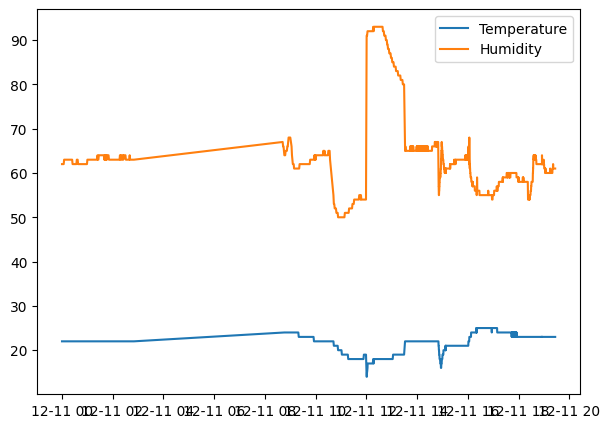

In [35]:
# Plot the data
plt.figure(figsize=(7, 5))
plt.plot(df["Temperature"], label="Temperature")
plt.plot(df["Humidity"], label="Humidity")
plt.legend()
plt.show()

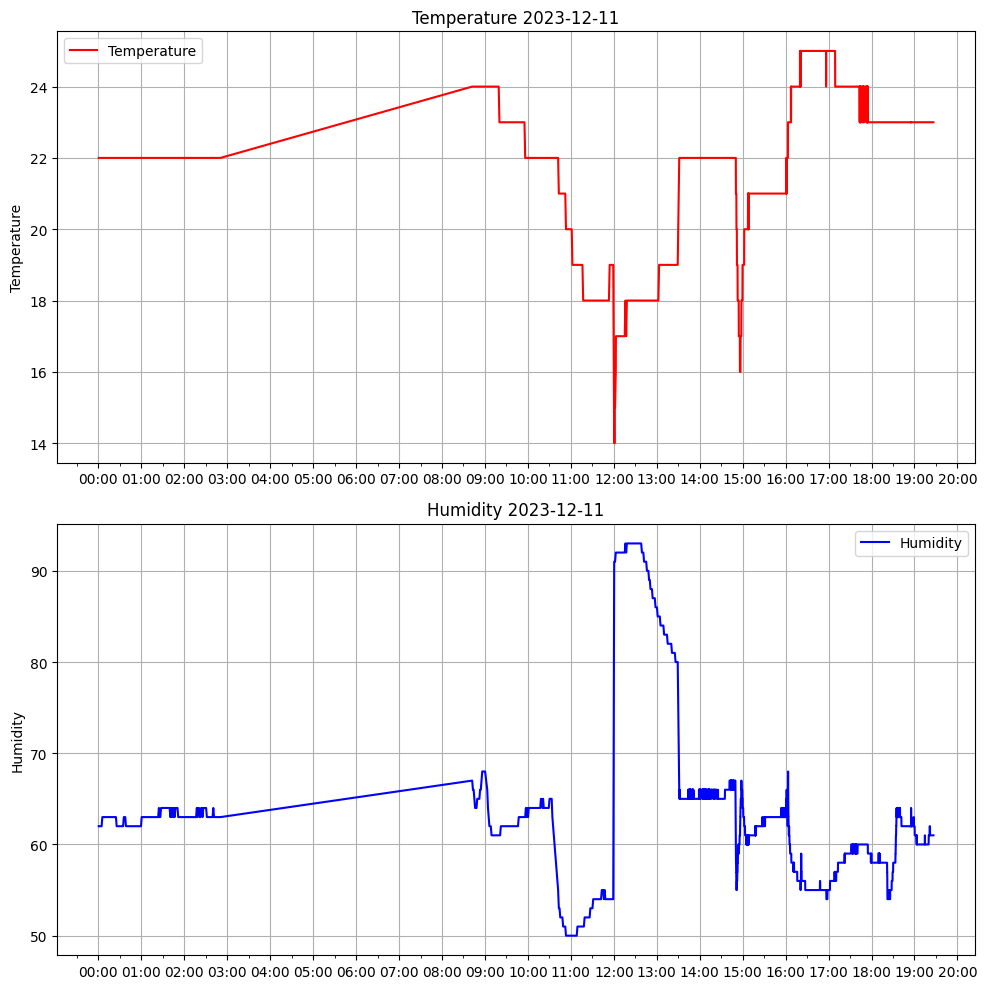

In [34]:
# Create separate plots for Temperature and Humidity
fig, axs = plt.subplots(2, figsize=(18, 10))


# Format x-axis to show hours and minutes
hours = mdates.HourLocator(interval=1)  # every hour
half_hours = mdates.MinuteLocator(byminute=[0, 30], interval=1)  # every half hour
fmt = mdates.DateFormatter("%H:%M")


# Temperature plot
axs[0].plot(df["Temperature"], label="Temperature", color="red")
axs[0].xaxis.set_major_locator(hours)
axs[0].xaxis.set_minor_locator(half_hours)
axs[0].xaxis.set_major_formatter(fmt)
axs[0].set_title(f'Temperature {df.index[0].strftime("%Y-%m-%d")}')
axs[0].set_ylabel("Temperature")
axs[0].grid(True)
axs[0].legend()

# Humidity plot
axs[1].plot(df["Humidity"], label="Humidity", color="blue")
axs[1].xaxis.set_major_locator(hours)
axs[1].xaxis.set_minor_locator(half_hours)
axs[1].xaxis.set_major_formatter(fmt)
axs[1].set_title(f'Humidity {df.index[0].strftime("%Y-%m-%d")}')
axs[1].set_ylabel("Humidity")
axs[1].grid(True)
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()